# 이미지 웹 크롤링 in 크롬

# 이미지 불러오기 및 resize

In [1]:
import glob

from PIL import Image
import numpy as np

In [2]:
top_images_jpg = glob.glob('./상의/' + '*.jpg')
top_images_png = glob.glob('./상의/' + '*.png')
top_images_jpeg = glob.glob('./상의/' + '*.jpeg')

pants_images_jpg = glob.glob('./하의/' + '*.jpg')
pants_images_png = glob.glob('./하의/' + '*.png')
pants_images_jpeg = glob.glob('./하의/' + '*.jpeg')

In [3]:
print(top_images_jpg[:5])
print('='*50)
print(pants_images_jpg[0:5])

['./상의\\000001.jpg', './상의\\000002.jpg', './상의\\000003.jpg', './상의\\000004.jpg', './상의\\000005.jpg']
['./하의\\1.83081_NVYB.jpg', './하의\\10.104115001_1.jpg', './하의\\10.A1_2.jpg', './하의\\100.14024323_18246600_300.jpg', './하의\\101.2018-fashion-mens-skinny-jeans-ripped-slim.jpg']


In [4]:
image_width = 64
image_height = 64

In [5]:
X = []
Y = []

a = [top_images_jpg, top_images_png, top_images_jpeg, pants_images_jpg, pants_images_png, pants_images_jpeg]

for idx, i in enumerate(a):
  if idx < 3:
    #이미지 로딩
    for i, f in enumerate(i):
      img = Image.open(f)
      img = img.convert("RGB")
      img = img.resize((image_width, image_height))
      data = np.asarray(img)
      X.append(data)
      Y.append(1)
  else:
    for i, f in enumerate(i):
      img = Image.open(f)
      img = img.convert("RGB")
      img = img.resize((image_width, image_height))
      data = np.asarray(img)
      X.append(data)
      Y.append(0)

C:\Python\py\Anaconda\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [6]:
X[0:5]

[array([[[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [245, 245, 245],
         [245, 245, 245],
         [245, 245, 245]],
 
        [[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [245, 245, 245],
         [245, 245, 245],
         [245, 245, 245]],
 
        [[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [245, 245, 245],
         [245, 245, 245],
         [245, 245, 245]],
 
        ...,
 
        [[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [245, 245, 245],
         [245, 245, 245],
         [245, 245, 245]],
 
        [[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [245, 245, 245],
         [245, 245, 245],
         [245, 245, 245]],
 
        [[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [245, 245, 245],
  

In [7]:
Y[0:5]

[1, 1, 1, 1, 1]

# 데이터 분리 저장

In [8]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


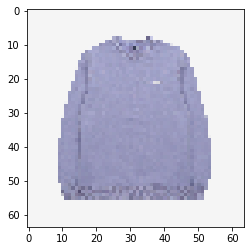

In [9]:
plt.imshow(X[0])

In [10]:
X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

(1897, 64, 64, 3) (1897,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
xy = (X_train, X_test, Y_train, Y_test)

In [12]:
np.save('clothes_1.npy', xy)

In [13]:
set(Y_train)

{0, 1}

# 모델링

In [14]:
## 사용할 모델 라이브러리 import
import sys, os
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [15]:
# root_dir = ""
categories = ["top", "pants"]
nb_classes = len(categories)
image_size = 64

In [16]:
# 데이터 불러오기
def load_dataset():
  x_train, x_test, y_train, y_test = np.load("./clothes.npy",allow_pickle=True)
  x_train = x_train.astype("float") / 256
  x_test = x_test.astype("float") / 256
  y_train = np_utils.to_categorical(y_train, nb_classes)
  y_test = np_utils.to_categorical(y_test, nb_classes)
  return x_train, x_test, y_train, y_test

In [17]:
# 모델 구성 (2) sigmoid
#def build_model(in_shape):
#  model = Sequential()
#  model.add(Convolution2D(32, 3, 3, border_mode='same',
#  input_shape=in_shape))
#  model.add(Activation('sigmoid'))
#  model.add(MaxPooling2D(pool_size=(2,2)))
#  model.add(Dropout(0.25)) # dropout
#  model.add(Convolution2D(64, 3, 3, border_mode='same'))
#  model.add(Activation('sigmoid'))
#  model.add(Convolution2D(64, 3, 3))
#  model.add(MaxPooling2D(pool_size=(2,2)))
#  # dropout
#  model.add(Flatten())
#  model.add(Dense(512))
#  model.add(Activation('sigmoid'))
#  # dropout
#  model.add(Dense(nb_classes))
#  model.add(Activation('softmax'))
#  model.compile(loss='categorical_crossentropy',
#                optimizer='adam',
#                metrics=['accuracy'])
#  return model

In [18]:
# 모델 구성 (2)  relu
def build_model(in_shape):
  model = Sequential()
  model.add(Convolution2D(32, 3, 3, border_mode='same',
  input_shape=in_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25)) # dropout
  model.add(Convolution2D(64, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  model.add(Convolution2D(64, 3, 3))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # dropout
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  # dropout
  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [19]:
# 모델 학습을 수행하고 저장된 모델을 파일로 저장  
def model_train(x, y):
    model = build_model(x.shape[1:])
    model.fit(x, y, batch_size=32, epochs=40)

    return model

In [20]:
# 모델 평가
def model_eval(model, x, y):
    score = model.evaluate(x, y)
    print('loss=', score[0])
    print('accuracy=', score[1])

In [21]:
# 모델 학습 및 평가
x_train, x_test, y_train, y_test = load_dataset()
model = model_train(x_train, y_train)
model_eval(model, x_test, y_test)


C:\Python\py\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., padding="same")`
  """
C:\Python\py\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if __name__ == '__main__':
C:\Python\py\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()



Epoch 1/50
1422/1422 [==============================] - 15s 10ms/step - loss: 0.9631 - accuracy: 0.6505
Epoch 2/50
1422/1422 [==============================] - 13s 9ms/step - loss: 0.4037 - accuracy: 0.8200
Epoch 3/50
1422/1422 [==============================] - 14s 10ms/step - loss: 0.2886 - accuracy: 0.8776
Epoch 4/50
1422/1422 [==============================] - 14s 10ms/step - loss: 0.2328 - accuracy: 0.9037
Epoch 5/50
1422/1422 [==============================] - 14s 10ms/step - loss: 0.1865 - accuracy: 0.9255
Epoch 6/50
1422/1422 [==============================] - 14s 10ms/step - loss: 0.1687 - accuracy: 0.9395
Epoch 7/50
1422/1422 [==============================] - 13s 9ms/step - loss: 0.1734 - accuracy: 0.9283
Epoch 8/50
1422/1422 [==============================] - 13s 9ms/step - loss: 0.1319 - accuracy: 0.9473
Epoch 9/50
1422/1422 [==============================] - 13s 9ms/step - loss: 0.1212 - accuracy: 0.9543
Epoch 10/50
1422/1422 [==============================] - 14s 10ms/s

In [22]:
model.save("./clothes_model_1.h5")

In [23]:
## 모델 테스트 하기

import sys, os
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.models import load_model
from PIL import Image
import numpy as np

In [24]:
#데이터 불러오기

img_files=["./test_img/top(1).jpg",
           "./test_img/top(2).png",
          "./test_img/pants(1).jpg"]


## 이미지 불러오기

X=[]; files=[];

for fname in img_files:
    print(fname)
    img=Image.open(fname)
    img=img.convert("RGB") #색깔
    img= img.resize((image_width, image_height))
    in_data=np.asarray(img)
    in_data= in_data.astype("float") /256
    X.append(in_data)
    files.append(fname)
    
X=np.array(X)    
print(X)
print(files)

./test_img/top(1).jpg
./test_img/top(2).png
./test_img/pants(1).jpg
[[[[0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   ...
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]]

  [[0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   ...
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]]

  [[0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   ...
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]]

  ...

  [[0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   ...
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.99609375 0.99609375]
   [0.99609375 0.

In [25]:
#파일 읽어오기
model=load_model("./clothes_model.h5")

#모델 예측
pred=model.predict(X)

#예측 출력
for idx, p in enumerate(pred):
    y=p.argmax()
    print("입력 : ",files[idx])
    print("예측 : ", " [", y, "]",
          categories[y], " / score ",p[y])

입력 :  ./test_img/top(1).jpg
예측 :   [ 1 ] pants  / score  1.0
입력 :  ./test_img/top(2).png
예측 :   [ 1 ] pants  / score  1.0
입력 :  ./test_img/pants(1).jpg
예측 :   [ 0 ] top  / score  1.0
